
Analyze A/B Test Results
You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page. Either way assure that your code passes the project RUBRIC. **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons. The hope is to have this project be as comprehensive of these topics as possible. Good luck!

Table of Contents
 -Introduction
 -Part I - Probability
 -Part II - A/B Test
 -Part III - Regression

Introduction
A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question. The labels for each classroom concept are provided for each question. This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria. As a final check, assure you meet all the criteria on the RUBRIC.


Part I - Probability
To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

1.Now, read in the ab_data.csv data. Store it in df. Use your dataframe to answer the questions in Quiz 1 of the classroom.

a.Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
6,679687,26:46.9,treatment,new_page,1
7,719014,48:29.5,control,old_page,0
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
no_of_rows = df.shape[0]
no_of_rows

294478

c. The number of unique users in the dataset.

In [5]:
unique = df['user_id'].unique()
len(unique)

290584

d. The proportion of users converted.

In [6]:
# we can find proportion of users converted by taking mean since values are 1 and 0# we ca 
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

Converted users proportion is 11.96591935560551%


e. The number of times the new_page and treatment don't line up.

In [7]:
len(df[(df['group'] == 'treatment') != (df['landing_page'] == 'new_page')])

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB



Answer: No, none of the rows have missing values.

2. For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. Use Quiz 2 in the classroom to provide how we should handle these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in df2.

In [9]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) & ((df['group'] == 'control') == (df['landing_page'] == 'old_page'))]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0


3.Use df2 and the cells below to answer questions for Quiz3 in the classroom.

a.How many unique user_ids are in df2?

In [11]:
len(df2['user_id'].unique())

290584


b. There is one user_id repeated in df2. What is it?

In [12]:
duplicate = df2[df2['user_id'].duplicated()]
print(duplicate)

      user_id timestamp      group landing_page  converted
2893   773192   55:59.6  treatment     new_page          0



c. What is the row information for the repeat user_id?

In [13]:
print ( "The row information is given below:")
duplicate

The row information is given below:


,user_id,timestamp,group,landing_page,converted
2893,773192,55:59.6,treatment,new_page,0



d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.

In [16]:
df2 = df2[df2.timestamp != '2017-01-14 02:55:59.590927']

4.Use df2 in the below cells to answer the quiz questions related to Quiz 4 in the classroom.

a.What is the probability of an individual converting regardless of the page they receive?

In [15]:
converted = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print ("probability of the individual converted regardless of the page: ",converted)

probability of the individual converted regardless of the page:  0.11959667567149027


b. Given that an individual was in the control group, what is the probability they converted?

In [17]:
control_grp = df2.query('group == "control"')
control_grp_prop = len(control_grp.query('converted == 1'))/len(control_grp)
print ("probablility of the control group converted: ", control_grp_prop)

probablility of the control group converted:  0.1203863045004612


c. Given that an individual was in the treatment group, what is the probability they converted?

In [18]:
treatment_grp = df2.query('group == "treatment"')
treatment_grp_prop = len(treatment_grp.query('converted == 1'))/len(treatment_grp)
print ("probablility of the treatment group converted: ", treatment_grp_prop)

probablility of the treatment group converted:  0.11880724790277405


d. What is the probability that an individual received the new page?

In [19]:
landing_new_page = len(df2[df2['landing_page'] == 'new_page'])/len(df2)
obs_diff = treatment_grp_prop - control_grp_prop 
print ("probability that an individual received the new page: ",landing_new_page) 
print ("observation difference: ", obs_diff)

probability that an individual received the new page:  0.5000636646764286
observation difference:  -0.0015790565976871451


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions? Write your response below.

Evidence that one page leads to more conversions?

1.Given that an individual was in the treatment group, the probability they converted is 0.118807

2.Given that an individual was in the control group, the probability they converted is 0.120386

3.We find that old page does better, but by a very tiny margin.

4.Change aversion, test span durations and other potentially influencing factors are not accounted for. So, we cannot state with certainty that one page leads to more conversions. This is even more important due to almost similar perforamnce of both pages.

Part II - A/B Test
Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? How long do you run to render a decision that neither page is better than another?

These questions are the difficult parts associated with A/B tests in general.

1.For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of $p_{old}$ and $p_{new}$, which are the converted rates for the old and new pages.

Null Hypothesis:
In null hypothesis the old page is considered to be better or equal to the new page (new <= old)

Alternative Hypothesis:
In the alternate hypothesis it is assumed that the new_page is better than the old page (new > old) .

Hypothesis
$H_{0}$ : $p_{old}$ >= $p_{new}$ $H_{1}$ : $p_{old}$ < $p_{new}$

In other words,

$H_{0}$ : $p_{new}$ <= $p_{old}$ $H_{1}$ : $p_{new}$ > $p_{old}$

2.Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the converted success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.


Use a sample size for each page equal to the ones in ab_data.csv.

Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.


Use the cells below to provide the necessary parts of this simulation. If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem. You can use Quiz 5 in the classroom to make sure you are on the right track.


a. What is the convert rate for $p_{new}$ under the null?

In [21]:
p_new = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print (p_new)

0.11959667567149027


b. What is the convert rate for $p_{old}$ under the null?

In [22]:
p_old = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print (p_old)

0.11959667567149027


c. What is $n_{new}$?

In [23]:
n_new = len(df2[df2['landing_page'] == 'new_page'])
n_new

145311

d. What is $n_{old}$?

In [24]:
n_old = len(df2[df2['landing_page'] == 'old_page'])
print (n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null. Store these $n_{new}$ 1's and 0's in new_page_converted.

In [25]:
#new_page_converted = df2[df2['landing_page'] == 'new_page']
new_page_converted = np.random.binomial(n_new,p_new,10000)/n_new
print (new_page_converted)

[0.12034877 0.11986016 0.12044511 ... 0.11788509 0.11961242 0.1190894 ]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null. Store these $n_{old}$ 1's and 0's in old_page_converted.

In [26]:
#old_page_converted = df2[df2['landing_page'] == 'old_page']
old_page_converted = np.random.binomial(n_old,p_old,10000)/n_old
print (old_page_converted)

[0.11905778 0.11865165 0.11935377 ... 0.12059281 0.11838319 0.12136377]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
p_diffs = new_page_converted - old_page_converted
p_diffs

array([ 0.00129099,  0.00120851,  0.00109134, ..., -0.00270772,
        0.00122922, -0.00227437])

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts a. through g. above. Store all 10,000 values in p_diffs.

In [28]:
p_diffs = []
for _ in range(10000) :
    #bootsample = df2.sample(200, replace= True)
    #a= bootsample[(bootsample['landing_page'] == 'new_page') & (bootsample['converted'] == 1)]
    #b= bootsample[(bootsample['landing_page'] == 'old_page') & (bootsample['converted'] == 1)]
    new_page_converted = np.random.binomial(n_new,p_new,1)/n_new
    old_page_converted = np.random.binomial(n_old,p_old,1)/n_old
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the p_diffs. Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.

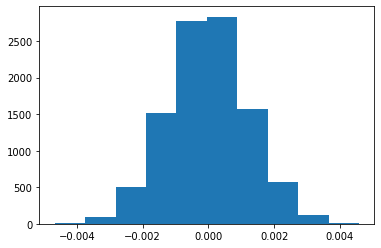

In [29]:
p_diffs = np.array(p_diffs)
#Sampling Distribution
plt.hist(p_diffs);

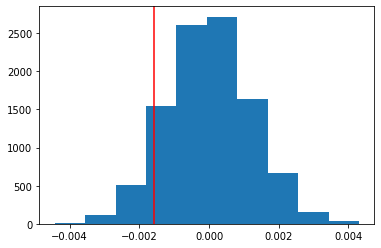

In [30]:
#Distribution under null hypothesis
null_values = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist( null_values)
plt.axvline(obs_diff, color = 'red');


j. What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [31]:
p_values = (p_diffs > obs_diff).mean()
p_values

0.9054

k. In words, explain what you just computed in part j.. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?

It has computed p_diffs(difference in the converted between the two pages) for the 10,000 boot sampling, and have given the proportion of the p_diffs(The p-value) greater than the actual difference observed from the actual dataset. So from this it is clear that the p_value is greater than the threshold value(0.05 or 5%) and hence we have failed to reject the null hypothesis (H0) and there is no significant difference between the page and converted.

l. We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])
n_old = len(df2[df2['landing_page'] == 'old_page'])
n_new = len(df2[df2['landing_page'] == 'new_page'])

m. Now use stats.proportions_ztest to compute your test statistic and p-value.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
print (z_score , p_value)

1.3116075339133115 0.905173705140591


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings in parts j. and k.?

In [35]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)/2))
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.905173705140591
1.959963984540054


Yes, From the calculation of the Z_score and the P_value it is clear that the p_value is greater than the thershold value 0.05 and it have failed to reject the null hypothesis (H0), and it is agreed with the previous finding using the bootsampling for 10000 datas saying there is no significant difference.

Answer:

1.We find that the z-score of 1.31092419842 is less than the critical value of 1.95996398454. So, we accept the null hypothesis.

2.As regards the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages.

3.These values agree with the findings in parts j. and k.


Part III - A regression approach
1.In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.


a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [36]:
df2['intercept'] = 1
df2[['ab_page','ba_page']] = pd.get_dummies(df2['group']=='control')
df2 = df2.drop('ba_page',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,11:48.6,control,old_page,0,1,0
1,804228,01:45.2,control,old_page,0,1,0
2,661590,55:06.2,treatment,new_page,0,1,1
3,853541,28:03.1,treatment,new_page,0,1,1
4,864975,52:26.2,control,old_page,1,1,0



c. Use statsmodels to import your regression model. Instantiate the model, and fit the model using the two columns you created in part b. to predict whether or not an individual converts.

In [37]:
# fix missing chisqprob issue, see https://github.com/statsmodels/statsmodels/issues/3931
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [38]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:               8.085e-06
Time:                        11:49:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""


e. What is the p-value associated with ab_page? Why does it differ from the value you found in the Part II?

Hint: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the Part II?

Answer:
Our hypothesis here is:

1.$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

2.$H_{1}$ : $p_{new}$ - $p_{old}$ != 0

The p-value associated with ab_page is 0.190.

Since this is greater than 0.05, we interpret this to mean that this analysis fails to reject the null hypothesis that this is a difference in conversion rate based on which page the cusotmer receives.

In Part II above, the null hypothesis was that the convesion rate of the old_page was greater than or equal. That explains the difference in p-values since here in Part III we are looking at just equal/not-equal ("two tails" of the probability distribution) where in Part II, we were looking at less-than-or-equals/greater-than ("one tail" of the probability distribution).

f. Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?


Answer:
1.We should consider other factors into the regression model as they might influence the conversions too. For instance student segments [new v/s returning candidates] might create change aversion or even, the opposite as a predisposition to conversion. Seasonality like new terms or New years might mean more interest in new skills/ resolutions. Timestamps are inlcuded but without regionality, they do not indicate if seasonality was a factor or not. [as different countries follow different term and weather patterns.

2.Factors like device on which tests were taken or course which was looked at, prior academic background, age, might alter experience and ultimately, conversions. These are limitations which should be at least kept in mind while making the final decision.

3.Finally : It's a good idea to consider other factors to add to the model because that may help us improve accuracy.

4.The disadvantages to adding additional terms into the regression model is that even with additional factors we can never account for all influencing factors or accomodate them. Plus, small pilots and pivots sometimes work better in practice than long-drawn research without execution.

5.Finally : Adding additional terms does make the analysis more complex and harder to understand. In addition, linear regression models can have problems like a lack of a linear relationship between response and predictor variables, correlated errors, non-constance variance and outliers (leverage points) that hurt the model. Or, the model might exhibit multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the countries.csv dataset and merge together your datasets on the approporiate rows.

Does it appear that country had an impact on conversion? Don't forget to create dummy variables for these country columns - Hint: You will need two columns for the three dummy varaibles. Provide the statistical output as well as a written response to answer this question.

In [42]:
# Read the countries csv file
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
# To merge Countries and AB data
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [44]:
### Create the necessary dummy variables
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [45]:
df_new['intercept'] = 1
df_new[['CA','UK','US']]=pd.get_dummies(df_new.country)
df_new[['new_page','old_page']]=pd.get_dummies(df_new.landing_page)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,new_page,old_page
user_id,,,,,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0,0,1,1,0
630001,US,16:42.6,treatment,new_page,1,1,1,0,0,1,1,0
630002,US,20:56.4,control,old_page,0,1,0,0,0,1,0,1
630003,US,09:31.5,treatment,new_page,0,1,1,0,0,1,1,0
630004,US,23:58.8,treatment,new_page,0,1,1,0,0,1,1,0


In [46]:
df_new['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [47]:
df_new['intercept'] = 1
log_mod = sm.Logit(df_new.converted,df_new[['intercept','CA','UK','new_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:               2.324e-05
Time:                        12:17:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
new_page      -0.0150      0.011     -1.308      0.191      -0.037       0.007
==============================================================================
"""

The p-value for the country dummy variables is greater than our $\alpha$ level of 0.05, so country is not statiscially significant for this model, and while the psuedo $R^2$ value is bigger indicated a better fit the increase does not seem large enough to justify adding the complexity.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [48]:
df_new['CA_new_page'] = df_new.CA * df_new.new_page
df_new['UK_new_page'] = df_new.UK * df_new.new_page
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,new_page,old_page,CA_new_page,UK_new_page
user_id,,,,,,,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0,0,1,1,0,0,0
630001,US,16:42.6,treatment,new_page,1,1,1,0,0,1,1,0,0,0
630002,US,20:56.4,control,old_page,0,1,0,0,0,1,0,1,0,0
630003,US,09:31.5,treatment,new_page,0,1,1,0,0,1,1,0,0,0
630004,US,23:58.8,treatment,new_page,0,1,1,0,0,1,1,0,0,0


In [49]:
### Fit Your Linear Model And Obtain the Results
log_mod = sm.Logit(df_new.converted,df_new[['intercept','CA','UK','new_page','CA_new_page','UK_new_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:               3.483e-05
Time:                        12:18:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA             -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK             -0.0057      0.019     -0.306      0.760      -0.043       0.031
new_page       -0.0206      0.014     -1.506      0.132      -0.047       0.006
CA_new_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_new_page     0.0314      0.027      1.181      0.238      -0.021       0.084
===============================================================================
"""


Adding the interaction variables does not improve the p-value for any of the dummy variables. They are all still less than our $\alpha$ level of 0.05 nor does the addition of the additional complexity significantly improve the psuedo $R^2$ value which indicates that this is not really an imporovement over the previous model.

Conclusions
1.The performance of the old page was found better (by miniscule values only) as computed by different techniques.

2.Hence, we accept the Null Hypothesis and Reject the Alternate Hypothesis.

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

4294967295

In [52]:
1/np.exp(-0.0752), np.exp(0.0149)

(1.0780997492739288, 1.0150115583846535)